## Regressão Linear Simples (usando OLS - Ordinary Least Squares)

* Features X: p variáveis independentes, sendo uma matriz de dimensão nxp;
* Variável Target/Dependente representada por y;
* Relação entre X e y é representado pela equação abaixo, onde $w_{i}$ representa os pesos de cada coeficiente e $w_{0}$ representa o intercepto.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm1.PNG?raw=true" width="300">

* Soma de Quadrados dos Resíduos (RSS) - Soma de Quadrados das diferenças entre os valores observados e preditos.

<img src="https://github.com/awantik/machine-learning-slides/blob/master/lm2.PNG?raw=true" width="500">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#pip install -U scikit-learn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn import metrics

In [4]:
nome_arq = 'Regress_ex2.xls'

In [5]:
df = pd.read_excel(nome_arq)
df.head(3)

,ID,x1,x2,x3
0,1,9.95,2,50
1,2,24.45,8,110
2,3,31.75,11,120


In [6]:
df.shape

(25, 4)

In [7]:
# teste de correlação data e target
df_quant = df.iloc[:,1:4]
df_quant.columns

Index(['x1', 'x2', 'x3'], dtype='object')

In [8]:
df_data = df.iloc[:,2:4]
df_data.columns

Index(['x2', 'x3'], dtype='object')

In [9]:
# target
y = df.iloc[:,1]
y.name

'x1'

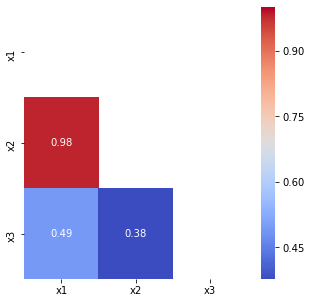

In [10]:
fig, ax = plt.subplots(figsize=(5, 5)) 
mask = np.zeros_like(df_quant.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_quant.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

In [11]:
X = df_data.values
y = y.values

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

In [16]:
y_train

array([52, 50, 72, 48, 60, 43, 62, 58], dtype=int64)

<img src= 'Architecture.png'>

## Parâmetros do algoritmo:
* fit_intercept - Indica se o intercepto $w_{0}$ deve ou não ser ajustado. Se os dados estão normalizados, então não faz sentido ajustar o intercepto $w_{0}$

* normalize - $X$ será automaticamente normalizada (subtrai a média e divide pelo desvio-padrão);

## Atributos do modelo de Machine Learning para Regressão
* coef - peso/fator de cada variável independente do modelo de ML;

* intercepto $w_{0}$ - intercepto ou viés de $y$f;

## Funções para ajuste do ML:
* fit - treina o modelo com as matrizes $X$ e $y$;
* predict - Uma vez que o modelo foi treinado, para um dado $X$, use $y$ para calcular os valores preditos de $y$ (y_pred).

<hr/>

# Limitações do OLS:
* Impactado por Outliers;
* Multicolinearidade; 
* Heterocedasticidade - apresenta-se como uma forte dispersão dos dados em torno de uma reta;

* <a href="http://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/">References</a>

In [ ]:
# Multicolinearidade
#<http://www4.eco.unicamp.br/docentes/gori/images/arquivos/EconometriaI/Ce423_Aula7_Multicolinearidade.pdf>
#<https://edisciplinas.usp.br/pluginfile.php/2340848/mod_resource/content/0/Mayara_Multicolinearidade.pdf>
#<https://www.ime.usp.br/~yambar/MI404-Metodos%20Estatisticos/Aula%208-9%20Regress%E3o%20mult%20dim/inete%20adicional%20-%20multicolinearidade%20em%20modelos%20de%20regressao.pdf>

In [12]:
# instanciar
lr = LinearRegression()
#lr.fit(X_train, y_train)
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# valores preditos de y
y_pred = lr.predict(X)

In [13]:
F, p_value = feature_selection.f_regression(X, y)

In [14]:
def signif(p):
    if  p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    else: return 'not'

In [19]:
print(f'r2: {metrics.r2_score(y, y_pred)}')

r2: 0.9811374834912948


In [20]:
d_df = {'coef':lr.coef_, 'F': F, 'p_value': p_value}
dfr = pd.DataFrame(d_df, index = df_data.columns)
dfr['significativo'] = dfr['p_value'].map(signif) 
dfr

,coef,F,p_value,significativo
x2,2.744270,615.080090,4.241181e-18,***
x3,0.012528,7.379779,1.230675e-02,*


In [39]:
print(f'Intercepto: {lr.intercept_}')

Intercepto: 2.2637914344045704


### Se p_value < 0.05 ==> variável significativa/relevante para o modelo

In [46]:
# Predição
lr.predict(np.array([[9, 115]]))

array([28.40291653])

In [65]:
y = lambda x: lr.coef_[0] * x + lr.intercept_

In [69]:
# modelo de predição
int(y(8) // 1)

63